In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./student_lifestyle_dataset.csv")
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [3]:
df['Stress_Level'].dtype

dtype('O')

In [4]:
#사용 안하는 열 삭제
df = df.drop(columns=['Student_ID','Extracurricular_Hours_Per_Day','Social_Hours_Per_Day','Physical_Activity_Hours_Per_Day'])
df.head()

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,GPA,Stress_Level
0,6.9,8.7,2.99,Moderate
1,5.3,8.0,2.75,Low
2,5.1,9.2,2.67,Low
3,6.5,7.2,2.88,Moderate
4,8.1,6.5,3.51,High


In [5]:
#결측치 확인
df.isnull().sum()

Study_Hours_Per_Day    0
Sleep_Hours_Per_Day    0
GPA                    0
Stress_Level           0
dtype: int64

In [6]:
# 데이터 요약
df.describe()

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000
mean,7.475800,7.501250,3.115960
std,1.423888,1.460949,0.298674
min,5.000000,5.000000,2.240000
25%,6.300000,6.200000,2.900000
50%,7.400000,7.500000,3.110000
75%,8.700000,8.800000,3.330000
max,10.000000,10.000000,4.000000


In [7]:
# Stress_Level의 고유값 확인
df['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [8]:
#Stress_Level을 범주형 데이터로 변환
#Low, Moderate, High 순서로 처리
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], categories=['Low', 'Moderate', 'High'], ordered=True) 
df['Stress_Level']

0       Moderate
1            Low
2            Low
3       Moderate
4           High
          ...   
1995    Moderate
1996    Moderate
1997    Moderate
1998        High
1999        High
Name: Stress_Level, Length: 2000, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [9]:
df['Stress_Level'].dtype

CategoricalDtype(categories=['Low', 'Moderate', 'High'], ordered=True, categories_dtype=object)

In [10]:
# 상관관계 분석
numeric_data = ['Study_Hours_Per_Day', 'GPA', 'Sleep_Hours_Per_Day'] #수치형만
corr_matrix = df[numeric_data].corr()
corr_matrix

,Study_Hours_Per_Day,GPA,Sleep_Hours_Per_Day
Study_Hours_Per_Day,1.000000,0.734468,0.026717
GPA,0.734468,1.000000,-0.004278
Sleep_Hours_Per_Day,0.026717,-0.004278,1.000000


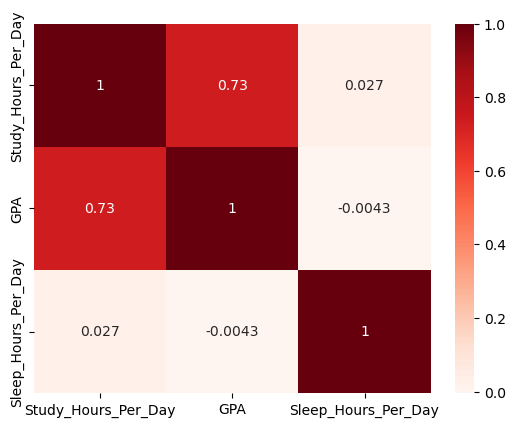

In [11]:
# 상관관계 heatmap
sns.heatmap(corr_matrix, annot=True, cmap="Reds",)
plt.show()

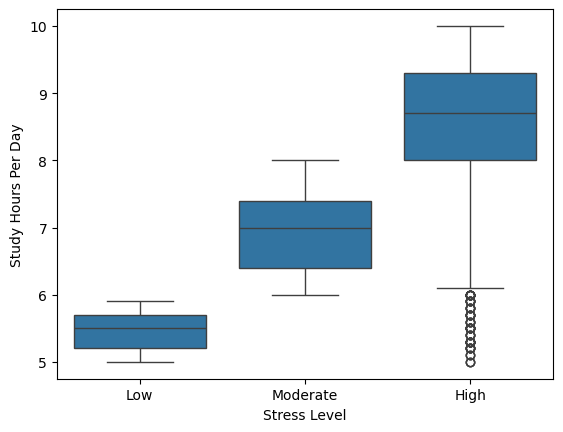

In [12]:
# Stress_Level과 Study_Hours_Per_Day의 관계
sns.boxplot(x='Stress_Level', y='Study_Hours_Per_Day', data=df)
plt.xlabel('Stress Level')
plt.ylabel('Study Hours Per Day')
plt.show()

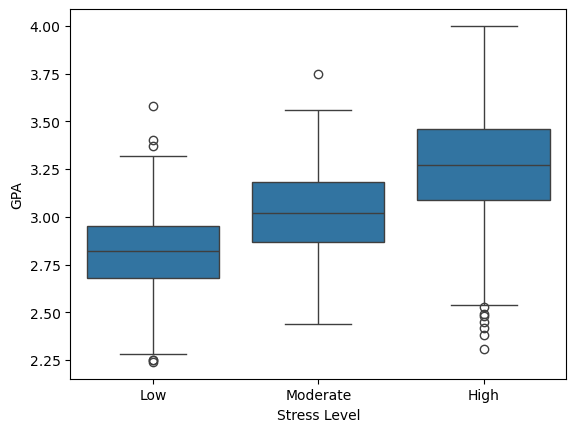

In [13]:
# Stress_Level과 GPA의 관계 시각화
sns.boxplot(x='Stress_Level', y='GPA', data=df)
plt.xlabel('Stress Level')
plt.ylabel('GPA')
plt.show()

###스트레스 수준이 Low & High일 때, GPA가 낮음
###스트레스 수준이 Moderate일때 GPA가 높음

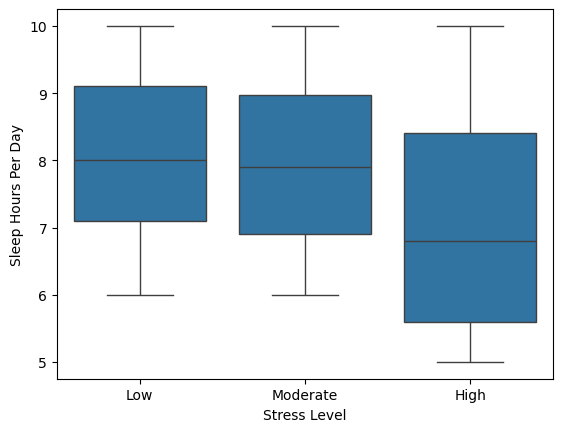

In [14]:
# Stress_Level과 Sleep_Hours_Per_Day의 관계
sns.boxplot(x='Stress_Level', y='Sleep_Hours_Per_Day', data=df)
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours Per Day')
plt.show()

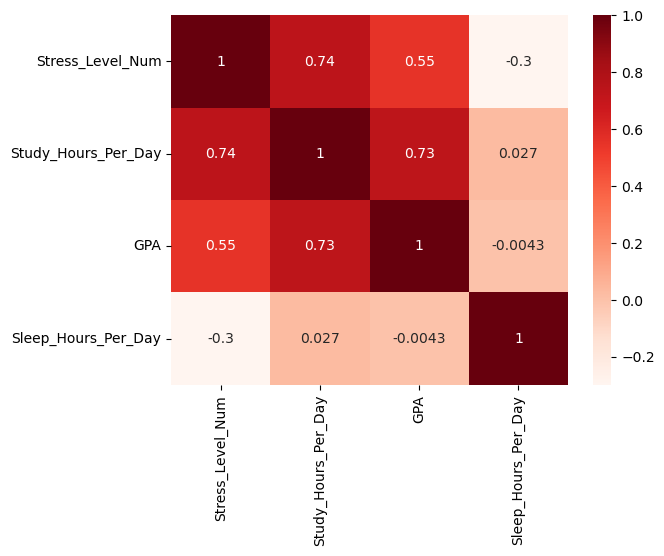

In [15]:
# Stress_Level 포함한 heatmap
# Stress_Level 수치형으로 변환
stress_num = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Stress_Level_Num'] = df['Stress_Level'].map(stress_num)

# 상관관계 계산
corr_matrix = df[['Stress_Level_Num', 'Study_Hours_Per_Day', 'GPA', 'Sleep_Hours_Per_Day']].corr()

# 히트맵 생성
sns.heatmap(corr_matrix, annot=True, cmap='Reds',)
plt.show()

<Axes: xlabel='Study_Hours_Per_Day', ylabel='GPA'>

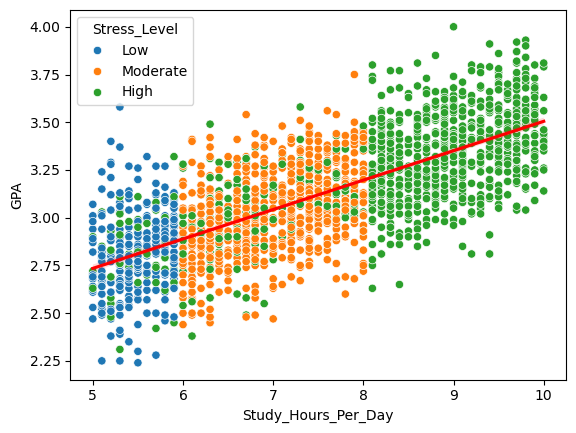

In [16]:
####번외
#Study_Hours_Per_Day와 GPA의 관계
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', hue='Stress_Level', data=df)
sns.regplot(x='Study_Hours_Per_Day', y='GPA', data=df, scatter=False, color='red')


In [17]:
# 수치형 데이터 확인
df.select_dtypes(include='number').head()

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,GPA
0,6.9,8.7,2.99
1,5.3,8.0,2.75
2,5.1,9.2,2.67
3,6.5,7.2,2.88
4,8.1,6.5,3.51


In [18]:
# 주요 수치형 데이터 통계량 계산
numerical_summary = df.describe()
numerical_summary.loc['median'] = df.select_dtypes(include='number').median()

numerical_summary

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000
mean,7.475800,7.501250,3.115960
std,1.423888,1.460949,0.298674
min,5.000000,5.000000,2.240000
25%,6.300000,6.200000,2.900000
50%,7.400000,7.500000,3.110000
75%,8.700000,8.800000,3.330000
max,10.000000,10.000000,4.000000
median,7.400000,7.500000,3.110000
